Mean of Pressure9am: 1017.6537584159653
Mean of Humidity9am: 68.8438103105705
Standard Deviation of Pressure9am: 7.105475711520846
Standard Deviation of Humidity9am: 19.051292535336177
Variance of Pressure9am: 50.487785087012675


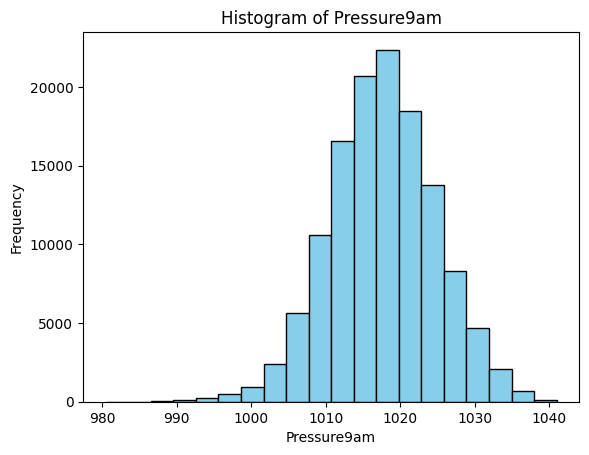

Variance of Humidity9am: 362.951747266956


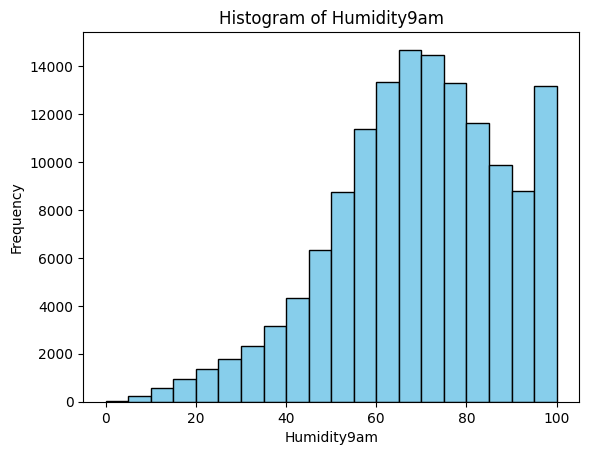

Minkowski Distance: 27.155294143131645
Accuracy: 0.7527181175014417
Sample Predictions: ['No' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No'
 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No' 'Yes' 'No' 'Yes' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No'
 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'No'
 'No' 'No']
Confusion Matrix:
 [[48751  6308]
 [11273  4765]]
Classification Report:
               precision    recall  f1-score   support

          No       0.81      0.89      0.85     55059
         Yes       0.43      0.30      0.35     16038

    accuracy                           0.75     71097
   macro avg       0.62      0.59      0.60     71097
weighted avg       0.73      0.75      0

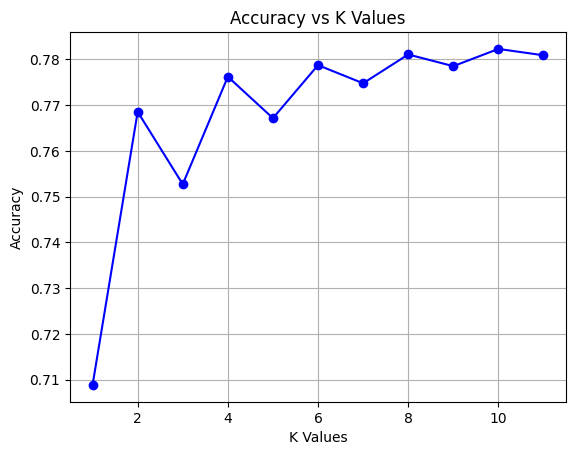

In [3]:
# Importing pandas to access the dataset and for data manipulation
import pandas as pd

# Importing numpy for array operations
import numpy as np

# Importing matplotlib for plotting
import matplotlib.pyplot as plt

# Importing scikit-learn modules for data preprocessing and KNN classification
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Importing scipy for distance calculation
from scipy.spatial import distance as dist

# A1: Read the dataset and calculate means and standard deviations
weather_data = pd.read_csv("weatherAUS.csv")

def calculate_mean(class_name):
    mean_value = weather_data[class_name].mean()
    return mean_value

def calculate_std_dev(class_name):
    std_dev = weather_data[class_name].std()
    return std_dev

print("Mean of Pressure9am:", calculate_mean('Pressure9am'))
print("Mean of Humidity9am:", calculate_mean('Humidity9am'))
print("Standard Deviation of Pressure9am:", calculate_std_dev('Pressure9am'))
print("Standard Deviation of Humidity9am:", calculate_std_dev('Humidity9am'))

# A2: Calculate variance and plot histograms
def calculate_variance(feature):
    variance = weather_data[feature].var()
    return variance

def plot_histogram(feature):
    plt.hist(weather_data[feature], bins=20, color='skyblue', edgecolor='black')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f"Histogram of {feature}")
    plt.show()

print("Variance of Pressure9am:", calculate_variance('Pressure9am'))
plot_histogram('Pressure9am')
print("Variance of Humidity9am:", calculate_variance('Humidity9am'))
plot_histogram('Humidity9am')

# A3: Calculate Minkowski distance
def calculate_minkowski_distance(point1, point2):
    minkowski_distance = dist.minkowski(point1, point2)
    return minkowski_distance

sample_point1 = weather_data[['Pressure9am', 'Humidity9am']].iloc[0]
sample_point2 = weather_data[['Pressure9am', 'Humidity9am']].iloc[1]
print("Minkowski Distance:", calculate_minkowski_distance(sample_point1, sample_point2))

# A4: Data preprocessing and splitting
X = weather_data[['Pressure9am', 'Humidity9am']].values
y = weather_data['RainTomorrow'].values

imputer = SimpleImputer(strategy="mean")
X = imputer.fit_transform(X)

imputer = SimpleImputer(strategy="most_frequent")
y = imputer.fit_transform(y.reshape(-1, 1)).flatten()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)

# A5: KNN Classification with K=3
knn_classifier = KNeighborsClassifier(n_neighbors=3)
knn_classifier.fit(X_train, y_train)

# A6: Model evaluation
accuracy = knn_classifier.score(X_test, y_test)
print("Accuracy:", accuracy)

# A7: Predictions and evaluation metrics
predictions = knn_classifier.predict(X_test)
print("Sample Predictions:", predictions[:100])
print("Confusion Matrix:\n", confusion_matrix(y_test, predictions))
print("Classification Report:\n", classification_report(y_test, predictions))

# A8: Comparison of KNN with different values of K
k_values = [1, 3, 5, 7, 9, 11]
for k in k_values:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    print(f"K={k} Accuracy:", accuracy)

# A9: Plotting accuracy for different K values
accuracy_values = []
for k in range(1, 12):
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    knn_classifier.fit(X_train, y_train)
    accuracy = knn_classifier.score(X_test, y_test)
    accuracy_values.append(accuracy)

plt.plot(range(1, 12), accuracy_values, marker='o', linestyle='-', color='b')
plt.xlabel('K Values')
plt.ylabel('Accuracy')
plt.title('Accuracy vs K Values')
plt.grid(True)
plt.show()
